In [1]:
class PatientExpertSystem:
    def __init__(self, data):
        self.data = data  # dictionary to store patient data with symptoms and scores

    # Swelling Analysis
    def check_swelling(self):
        areas = ["Ankles", "Legs", "Thighs", "Abdomen", "Face"]
        results = []
        for area in areas:
            score = self.data.get(f"Swelling {area}", 0)
            if score >= 3:
                results.append(f"Severe swelling in {area} (Score: {score}/5) - consider diuretics or further investigation.")
            elif score > 0:
                results.append(f"Mild swelling in {area} (Score: {score}/5) - monitor closely.")
        return results if results else ["No significant swelling noted."]

    # Itching Analysis
    def check_itching(self):
        results = []
        itching_swelling = self.data.get("Itching in the areas of swelling", 0)
        itching_all_over = self.data.get("Itching all over", 0)
        if itching_swelling >= 3:
            results.append("Severe itching in swollen areas - consider allergy or fluid overload.")
        if itching_all_over >= 3:
            results.append("Severe generalized itching - possible systemic reaction.")
        return results if results else ["No significant itching noted."]

    # Skin Conditions
    def check_skin_conditions(self):
        blisters = self.data.get("Blisters", 0)
        open_wounds = self.data.get("Open wounds", 0)
        results = []
        if blisters >= 3:
            results.append("Presence of blisters - consider dermatological evaluation.")
        if open_wounds >= 3:
            results.append("Presence of open wounds - high risk of infection.")
        return results if results else ["No significant skin conditions noted."]

    # Shortness of Breath Analysis
    def check_shortness_of_breath(self):
        results = []
        nyha_class = self.data.get("NYHA Class", 0)
        if nyha_class == 4:
            results.append("Severe shortness of breath at rest (NYHA Class 4) - immediate intervention needed.")
        elif nyha_class == 3:
            results.append("Shortness of breath with mild exertion (NYHA Class 3) - monitor closely.")
        elif nyha_class == 2:
            results.append("Shortness of breath with moderate exertion (NYHA Class 2).")
        elif nyha_class == 1:
            results.append("No limitation to physical activities (NYHA Class 1).")
        
        if self.data.get("Shortness of breath when lying flat in bed", 0) >= 3:
            results.append("Shortness of breath when lying flat - suggestive of heart failure or fluid overload.")
        
        return results if results else ["Breathing symptoms within normal limits."]

    # Chest Pain and Tightness
    def check_chest_symptoms(self):
        results = []
        chest_pain = self.data.get("Chest pain", 0)
        chest_tightness = self.data.get("Chest tightness with exertion", 0)
        chest_heaviness = self.data.get("Chest heaviness when lying back in bed", 0)
        
        if chest_pain >= 3:
            results.append("Significant chest pain - consider immediate cardiac evaluation.")
        if chest_tightness >= 3:
            results.append("Severe chest tightness with exertion - possible angina or heart strain.")
        if chest_heaviness >= 3:
            results.append("Chest heaviness when lying back - potential heart failure symptom.")
        
        return results if results else ["No significant chest symptoms noted."]

    # Gastrointestinal Symptoms
    def check_gastrointestinal_symptoms(self):
        results = []
        gi_symptoms = {
            "Nausea": self.data.get("Nausea", 0),
            "Vomiting": self.data.get("Vomiting", 0),
            "Right upper quadrant pain": self.data.get("Right upper quadrant pain", 0),
            "Diarrhea": self.data.get("Diarrhea", 0),
            "Bad taste": self.data.get("Bad taste", 0),
            "Loss of appetite": self.data.get("Loss of appetite", 0)
        }
        
        for symptom, score in gi_symptoms.items():
            if score >= 3:
                results.append(f"Significant {symptom.lower()} - consider further investigation.")
        
        return results if results else ["No significant gastrointestinal symptoms noted."]

    # Sleep Apnea Analysis
    def check_sleep_apnea(self):
        sleep_apnea_status = self.data.get("Presence of Sleep Apnea", "")
        if sleep_apnea_status == "Yes, untreated":
            return ["Sleep apnea present but untreated - CPAP may be recommended."]
        elif sleep_apnea_status == "Using CPAP":
            return ["Sleep apnea present and treated with CPAP."]
        else:
            return ["No sleep apnea or adequately managed."]

    # Assessment
    def assess_patient(self):
        assessments = {
            "Swelling": self.check_swelling(),
            "Itching": self.check_itching(),
            "Skin Conditions": self.check_skin_conditions(),
            "Shortness of Breath": self.check_shortness_of_breath(),
            "Chest Symptoms": self.check_chest_symptoms(),
            "Gastrointestinal Symptoms": self.check_gastrointestinal_symptoms(),
            "Sleep Apnea": self.check_sleep_apnea(),
        }
        
        # Print grouped assessment
        for category, results in assessments.items():
            print(f"{category} Assessment:")
            for result in results:
                print(f"  - {result}")
            print("\n" + "-"*40 + "\n")

In [2]:
patient_data = {
    "Swelling Ankles": 5,
    "Swelling Legs": 5,
    "Swelling Thighs": 4,
    "Swelling Abdomen": 3,
    "Swelling Face": 3,
    "Itching in the areas of swelling": 2,
    "Itching all over": 1,
    "Blisters": 3,
    "Open wounds": 1,
    "NYHA Class": 4,
    "Shortness of breath when lying flat in bed": 3,
    "Chest pain": 2,
    "Chest tightness with exertion": 3,
    "Chest heaviness when lying back in bed": 3,
    "Nausea": 2,
    "Vomiting": 3,
    "Right upper quadrant pain": 3,
    "Diarrhea": 2,
    "Bad taste": 3,
    "Loss of appetite": 4,
    "Presence of Sleep Apnea": "Yes, untreated"
}

In [3]:
expert_system = PatientExpertSystem(patient_data)

In [4]:
expert_system.assess_patient()

Swelling Assessment:
  - Severe swelling in Ankles (Score: 5/5) - consider diuretics or further investigation.
  - Severe swelling in Legs (Score: 5/5) - consider diuretics or further investigation.
  - Severe swelling in Thighs (Score: 4/5) - consider diuretics or further investigation.
  - Severe swelling in Abdomen (Score: 3/5) - consider diuretics or further investigation.
  - Severe swelling in Face (Score: 3/5) - consider diuretics or further investigation.

----------------------------------------

Itching Assessment:
  - No significant itching noted.

----------------------------------------

Skin Conditions Assessment:
  - Presence of blisters - consider dermatological evaluation.

----------------------------------------

Shortness of Breath Assessment:
  - Severe shortness of breath at rest (NYHA Class 4) - immediate intervention needed.
  - Shortness of breath when lying flat - suggestive of heart failure or fluid overload.

----------------------------------------

Chest S

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

data = {
    # Features
    "Swelling_Ankles": [3, 5, 2, 2],
    "Swelling_Legs": [2, 5, 1, 1],
    "Swelling_Thighs": [0, 4, 0, 0],
    "Swelling_Abdomen": [0, 5, 1, 0],
    "Swelling_Face": [0, 3, 0, 0],
    "Itching_swelling": [2, 3, 1, 1],
    "Itching_all_over": [0, 2, 0, 0],
    "Blisters": [0, 3, 0, 0],
    "Open_wounds": [0, 2, 0, 0],
    "NYHA_Class": [4, 4, 2, 2],
    "Shortness_breath_flat": [2, 5, 0, 0],
    "Chest_pain": [0, 3, 0, 0],
    "Chest_tightness_exertion": [2, 5, 0, 0],
    "Chest_heaviness_lying_back": [2, 5, 0, 0],
    "Nausea": [0, 2, 0, 0],
    "Vomiting": [0, 1, 0, 0],
    "RUQ_pain": [0, 3, 0, 0],
    "Diarrhea": [0, 3, 0, 0],
    "Bad_taste": [0, 2, 2, 3],
    "Loss_of_appetite": [0, 5, 0, 0],
    "Sleep_apnea": [1, 1, 1, 1],  # 1 for "Yes, untreated", 0 for "No"
    # Target Labels (dummy labels)
    "Severity": ["Moderate", "Severe", "Mild", "Mild"]
}


df = pd.DataFrame(data)


X = df.drop(columns=["Severity"])
y = df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))


tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)


              precision    recall  f1-score   support

    Moderate       0.00      1.00      0.00       0.0
      Severe       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

|--- Chest_heaviness_lying_back <= 1.00
|   |--- class: Mild
|--- Chest_heaviness_lying_back >  1.00
|   |--- class: Moderate



In [38]:
patients_data = [
    {
        "patient_id": 6,
        "previous_observation": None,
        "demographic": {
            "gender": "FEMALE",
            "race": "CAUCASIAN",
            "age": 82
        },
        "history": ["CERVICAL CANCER", "DIABETES"],
        "observations": {
            "10/22/2023": {
                "BP":{
                    "sitting": 174/88,
                    "standing": 184/88
                },
                "weight": 220,
                "pulse": 66,
                "respiration": 55, 
                "swelling":{
                    "ankles": 2,
                    "legs": 1,
                    "abdomen": 1,
                    "face": 0,
                    "local": 2
                },
                "itching": 1,
                "shortness_of_breath": {
                    "NYHA Class 4": 0,
                    "NYHA Class 3": 3,
                    "NYHA Class 2": 4,
                    "NYHA Class 1": 0,
                    "sinus_congestion": 1,
                    "anxiety_at_night": 2
                },
                "labs":{
                    "serum_creatinine": 2.5,
                    "egfr": 19,
                    "potasium": 4.8,
                    "sodium": 132,
                    "ser_co2": 19,
                    "ven_ph": 7.36,
                    "bun": 46,
                    "cl": 104,
                    "hb": 8.8,
                    "iron": 8,
                    "calcium": 8.2,
                    "phosphorus": 4.8
                },
                "medicines" : {
                    "amlodipine": 10,
                    "metoprolol": 100,
                    "losartan": 100,
                    "clonidine": {
                        "dose": 0.2,
                        "freq": 3
                    },
                    "hydralazine": {
                        "dose": 100,
                        "freq": 3
                    },
                    "furosemide": None,
                    "sodium_bicarbonate": None,
                    "ferrous_sulfate": None
                },
                "solution": "Monitor BP, adjust medications, consider diuretics for swelling."
            },
            "11/22/2023": {
                "BP":{
                    "sitting": 154/82,
                    "standing": 156/80
                },
                "weight": 214,
                "pulse": 72,
                "respiration": 55, 
                "swelling":{
                    "ankles": 1,
                    "legs": 0,
                    "abdomen": 0,
                    "face": 0,
                    "local": 0
                },
                "itching": 0,
                "shortness_of_breath": {
                    "NYHA Class 4": 0,
                    "NYHA Class 3": 1,
                    "NYHA Class 2": 3,
                    "NYHA Class 1": 0,
                    "sinus_congestion": 0,
                    "anxiety_at_night": 1
                },
                "labs":{
                    "serum_creatinine": 2.8,
                    "egfr": 16,
                    "potasium": 5.2,
                    "sodium": 134,
                    "ser_co2": 20,
                    "ven_ph": 7.38,
                    "bun": 52,
                    "cl": 102,
                    "hb": 8.9,
                    "iron": 8,
                    "calcium": 8.2,
                    "phosphorus": 4.9
                },
                "medicines" : {
                    "amlodipine": 10,
                    "metoprolol": 100,
                    "losartan": 100,
                    "clonidine": {
                        "dose": 0.1,
                        "freq": 3
                    },
                    "hydralazine": {
                        "dose": 50,
                        "freq": 2
                    },
                    "furosemide": {
                        "dose": 40,
                        "freq": 2
                    },
                    "sodium_bicarbonate": None,
                    "ferrous_sulfate": {
                        "dose": 325,
                        "freq": 1
                    },
                },
                "solution": "Adjust antihypertensive medication, monitor potassium."
            },
            "12/22/2023": {
                "BP":{
                    "sitting": 138/68,
                    "standing": 128/60
                },
                "weight": 212,
                "pulse": 68,
                "respiration": 55, 
                "swelling": None,
                "itching": 0,
                "shortness_of_breath": {
                    "NYHA Class 4": 0,
                    "NYHA Class 3": 1,
                    "NYHA Class 2": 1,
                    "NYHA Class 1": 0,
                    "sinus_congestion": 0,
                    "anxiety_at_night": 1
                },
                "labs":{
                    "serum_creatinine": 3.0,
                    "egfr": 15,
                    "potasium": 5.4,
                    "sodium": 136,
                    "ser_co2": 18,
                    "ven_ph": 7.35,
                    "bun": 64,
                    "cl": 104,
                    "hb": 8.0,
                    "iron": 8,
                    "calcium": 8.0,
                    "phosphorus": 5.2
                },
                "medicines" : {
                    "amlodipine": 10,
                    "metoprolol": 100,
                    "losartan": 50,
                    "clonidine": {
                        "dose": 0.1,
                        "freq": 2
                    },
                    "hydralazine": None,
                    "furosemide": {
                        "dose": 40,
                        "freq": 2
                    },
                    "sodium_bicarbonate": {
                        "dose": 650,
                        "freq": 3
                    },
                    "ferrous_sulfate": None
                },
                "solution": None
            },
            "01/22/2024": {
                "BP":{
                    "sitting": 114/66,
                    "standing": 90/66
                },
                "weight": 2,
                "pulse": None,
                "respiration": 55, 
                "swelling": None,
                "itching": 0,
                "shortness_of_breath": None,
                "labs":{
                    "serum_creatinine": 3.5,
                    "egfr": None,
                    "potasium": 4.0,
                    "sodium": 140,
                    "ser_co2": 24,
                    "ven_ph": 7.40,
                    "bun": 52,
                    "cl": 102,
                    "hb": 9.2,
                    "iron": 12,
                    "calcium": 8.4,
                    "phosphorus": 3.4
                },
                "medicines" : {
                    "amlodipine": 10,
                    "metoprolol": 100,
                    "losartan": 50,
                    "clonidine": {
                        "dose": 0.1,
                        "freq": 2
                    },
                    "hydralazine": None,
                    "furosemide": {
                        "dose": 40,
                        "freq": 1
                    },
                    "sodium_bicarbonate": {
                        "dose": 650,
                        "freq": 3
                    },
                    "ferrous_sulfate": None
                },
                "solution": None
            }
        }
    }
]



In [39]:
class ForwardChainingExpertSystem:
    def __init__(self, data):
        self.data = data 
        self.actions = [] 

    def apply_rules(self, patient_data, time_label):
        print(f"Processing {time_label} data for patient.")

        # Rule 1: Blood pressure
        bp = patient_data.get("BP")
        if bp:
            bp_sitting = bp.get("sitting")
            bp_standing = bp.get("standing")
            if bp_sitting and bp_sitting > 160:
                self.actions.append((time_label, f"High sitting BP ({bp_sitting}) - Monitor for hypertension and adjust medications if necessary."))
            if bp_standing and bp_standing > 160:
                self.actions.append((time_label, f"High standing BP ({bp_standing}) - Check for postural hypotension risks and adjust medications."))

        # Rule 2: Weight changes
        if "Previous Weight" in patient_data and patient_data.get("weight") is not None:
            if patient_data["weight"] > patient_data["Previous Weight"] + 5:
                self.actions.append((time_label, "Significant weight gain - possible fluid overload; consider diuretics adjustment."))

        # Rule 3: Shortness of breath by NYHA Class
        shortness_of_breath = patient_data.get("shortness_of_breath", {})
        if shortness_of_breath:
            if shortness_of_breath.get("NYHA Class 4", 0) >= 1:
                self.actions.append((time_label, "Severe shortness of breath at rest (NYHA Class 4) - Immediate intervention may be needed."))
            elif shortness_of_breath.get("NYHA Class 3", 0) >= 1:
                self.actions.append((time_label, "Shortness of breath with mild exertion (NYHA Class 3) - Monitor closely."))
            elif shortness_of_breath.get("NYHA Class 2", 0) >= 1:
                self.actions.append((time_label, "Shortness of breath with moderate exertion (NYHA Class 2) - Mild limitation, monitor symptoms."))
            elif shortness_of_breath.get("NYHA Class 1", 0) >= 1:
                self.actions.append((time_label, "No limitation to physical activities (NYHA Class 1) - No immediate action needed."))
            if shortness_of_breath.get("sinus_congestion", 0) >= 3:
                self.actions.append((time_label, "Severe sinus congestion at night - May indicate fluid retention or possible sleep apnea."))
            if shortness_of_breath.get("anxiety_at_night", 0) >= 3:
                self.actions.append((time_label, "High anxiety at night - Consider psychological support or sedative evaluation."))

        # Rule 4: Swelling in various areas
        swelling = patient_data.get("swelling")
        if swelling:
            severe_swelling_count = sum(value >= 3 for value in swelling.values() if value is not None)
            if severe_swelling_count >= 2:
                self.actions.append((time_label, "Severe swelling in multiple areas - Consider diuretics or further investigation."))
            elif severe_swelling_count > 0:
                self.actions.append((time_label, "Mild to moderate swelling noted - Monitor and manage accordingly."))

        # Rule 5: Itching
        if patient_data.get("itching") is not None and patient_data["itching"] >= 3:
            self.actions.append((time_label, "Severe generalized itching - Potential systemic reaction or renal issues."))

        # Rule 6: Lab values
        labs = patient_data.get("labs")
        if labs:
            if labs.get("serum_creatinine") and labs["serum_creatinine"] > 3.0:
                self.actions.append((time_label, "Elevated creatinine level - possible kidney function decline."))
            if labs.get("egfr") and labs["egfr"] < 20:
                self.actions.append((time_label, "Low eGFR - indicates advanced kidney disease; monitor closely."))
            if labs.get("potasium") and labs["potasium"] > 5.0:
                self.actions.append((time_label, "High potassium level - Monitor for hyperkalemia, which may require intervention."))
            if labs.get("hb") and labs["hb"] < 9.0:
                self.actions.append((time_label, "Low hemoglobin level - possible anemia, consider iron supplements."))
            if labs.get("iron") and labs["iron"] < 10:
                self.actions.append((time_label, "Low iron level - may require iron supplementation."))
            if labs.get("ser_co2") and labs["ser_co2"] < 20:
                self.actions.append((time_label, "Low CO2 level - check for metabolic acidosis."))

        # Rule 7: Medications adjustments
        medicines = patient_data.get("medicines")
        if medicines:
            furosemide = medicines.get("furosemide")
            if furosemide is None or furosemide.get("dose") is None:
                self.actions.append((time_label, "Patient is not on diuretics despite swelling - consider prescribing Furosemide."))
            sodium_bicarbonate = medicines.get("sodium_bicarbonate")
            if sodium_bicarbonate and sodium_bicarbonate.get("dose") is not None and labs and labs.get("ser_co2", 25) < 20:
                self.actions.append((time_label, "Patient on sodium bicarbonate with low CO2 levels - check for acidosis and adjust sodium bicarbonate dosage."))

        print(f"Completed processing rules for {time_label}.")

    def run(self):
        for patient_index, patient in enumerate(self.data, start=1):
            print(f"Processing patient {patient_index} data.")
            previous_weight = None
            for time_label, patient_data in patient["observations"].items():
                
                # Handle previous weight for each observation
                if previous_weight is not None:
                    patient_data["Previous Weight"] = previous_weight
                previous_weight = patient_data.get("weight", 0)
                
                # Process each observation
                print(f"Processing observation for {time_label}.")
                self.apply_rules(patient_data, time_label)

            print(f"Completed processing patient {patient_index}.\n")
                
        print("All patients processed. Returning actions.")
        return self.actions

In [40]:
expert_system = ForwardChainingExpertSystem(patients_data)
actions = expert_system.run()

print("\nTriggered Actions Based on Patient Data and Time Progression:")
for time_label, action in actions:
    print(f"{time_label}: {action}")


Processing patient 1 data.
Processing observation for 10/22/2023.
Processing 10/22/2023 data for patient.
Completed processing rules for 10/22/2023.
Processing observation for 11/22/2023.
Processing 11/22/2023 data for patient.
Completed processing rules for 11/22/2023.
Processing observation for 12/22/2023.
Processing 12/22/2023 data for patient.
Completed processing rules for 12/22/2023.
Processing observation for 01/22/2024.
Processing 01/22/2024 data for patient.
Completed processing rules for 01/22/2024.
Completed processing patient 1.

All patients processed. Returning actions.

Triggered Actions Based on Patient Data and Time Progression:
10/22/2023: Shortness of breath with mild exertion (NYHA Class 3) - Monitor closely.
10/22/2023: Low eGFR - indicates advanced kidney disease; monitor closely.
10/22/2023: Low hemoglobin level - possible anemia, consider iron supplements.
10/22/2023: Low iron level - may require iron supplementation.
10/22/2023: Low CO2 level - check for metabo

In [41]:
class BackwardChainingExpertSystem:
    def __init__(self, data):
        self.goals = [
            "Severe Shortness of Breath",
            "High Potassium",
            "Significant Weight Gain",
            "Severe Swelling",
            "High Blood Pressure",
            "Low eGFR",
            "Anemia",
            "Low CO2"
        ]
        self.data = data
        self.conclusions = []  # Store conclusions based on goals achieved

    def check_goal(self, goal, patient_data, time_label):
        if goal == "Severe Shortness of Breath":
            return self.check_severe_shortness_of_breath(patient_data, time_label)
        elif goal == "High Potassium":
            return self.check_high_potassium(patient_data, time_label)
        elif goal == "Significant Weight Gain":
            return self.check_significant_weight_gain(patient_data, time_label)
        elif goal == "Severe Swelling":
            return self.check_severe_swelling(patient_data, time_label)
        elif goal == "High Blood Pressure":
            return self.check_high_blood_pressure(patient_data, time_label)
        elif goal == "Low eGFR":
            return self.check_low_egfr(patient_data, time_label)
        elif goal == "Anemia":
            return self.check_anemia(patient_data, time_label)
        elif goal == "Low CO2":
            return self.check_low_co2(patient_data, time_label)
        return False

    def check_severe_shortness_of_breath(self, patient_data, time_label):
        nyha_scores = patient_data.get("shortness_of_breath", {})
        if nyha_scores and nyha_scores.get("NYHA Class 4", 0) >= 1:
            self.conclusions.append((time_label, "Severe shortness of breath at rest (NYHA Class 4) - Immediate intervention may be needed."))
            return True
        return False

    def check_high_potassium(self, patient_data, time_label):
        labs = patient_data.get("labs", {})
        if labs and labs.get("potasium") and labs["potasium"] > 5.0:
            self.conclusions.append((time_label, "High potassium level - Monitor for hyperkalemia, which may require intervention."))
            return True
        return False

    def check_significant_weight_gain(self, patient_data, time_label):
        if "Previous Weight" in patient_data and patient_data.get("weight") is not None:
            if patient_data["weight"] > patient_data["Previous Weight"] + 5:
                self.conclusions.append((time_label, "Significant weight gain - possible fluid overload; consider diuretics adjustment."))
                return True
        return False

    def check_severe_swelling(self, patient_data, time_label):
        swelling = patient_data.get("swelling")
        if swelling:
            severe_swelling_count = sum(value >= 3 for value in swelling.values() if value is not None)
            if severe_swelling_count >= 2:
                self.conclusions.append((time_label, "Severe swelling in multiple areas - Consider diuretics or further investigation."))
                return True
        return False

    def check_high_blood_pressure(self, patient_data, time_label):
        bp = patient_data.get("BP")
        if bp:
            if bp.get("sitting") and bp["sitting"] > 160:
                self.conclusions.append((time_label, f"High sitting BP ({bp['sitting']}) - Monitor for hypertension and adjust medications if necessary."))
                return True
            if bp.get("standing") and bp["standing"] > 160:
                self.conclusions.append((time_label, f"High standing BP ({bp['standing']}) - Check for postural hypotension risks and adjust medications."))
                return True
        return False

    def check_low_egfr(self, patient_data, time_label):
        labs = patient_data.get("labs")
        if labs and labs.get("egfr") and labs["egfr"] < 20:
            self.conclusions.append((time_label, "Low eGFR - indicates advanced kidney disease; monitor closely."))
            return True
        return False

    def check_anemia(self, patient_data, time_label):
        labs = patient_data.get("labs")
        if labs and labs.get("hb") and labs["hb"] < 9.0:
            self.conclusions.append((time_label, "Low hemoglobin level - possible anemia, consider iron supplements."))
            return True
        return False

    def check_low_co2(self, patient_data, time_label):
        labs = patient_data.get("labs")
        if labs and labs.get("ser_co2") and labs["ser_co2"] < 20:
            self.conclusions.append((time_label, "Low CO2 level - check for metabolic acidosis."))
            return True
        return False

    def evaluate(self):
        for patient_index, patient in enumerate(self.data, start=1):
            print(f"Evaluating patient {patient_index} data for goals.")
            previous_weight = None
            for time_label, patient_data in patient["observations"].items():
                
                # Set the previous weight for weight gain check
                if previous_weight is not None:
                    patient_data["Previous Weight"] = previous_weight
                previous_weight = patient_data.get("weight", 0)

                print(f"Checking goals for observation at {time_label}.")
                
                # Check each goal for the current observation
                for goal in self.goals:
                    if self.check_goal(goal, patient_data, time_label):
                        print(f"Goal '{goal}' met for {time_label}.")

            print(f"Completed evaluating patient {patient_index}.\n")

        print("All patients evaluated. Returning conclusions.")
        return self.conclusions


In [42]:
expert_system = BackwardChainingExpertSystem(patients_data)
conclusions = expert_system.evaluate()

print("\nConclusions based on Patient Data:")
for time_label, conclusion in conclusions:
    print(f"{time_label}: {conclusion}")

Evaluating patient 1 data for goals.
Checking goals for observation at 10/22/2023.
Goal 'Low eGFR' met for 10/22/2023.
Goal 'Anemia' met for 10/22/2023.
Goal 'Low CO2' met for 10/22/2023.
Checking goals for observation at 11/22/2023.
Goal 'High Potassium' met for 11/22/2023.
Goal 'Low eGFR' met for 11/22/2023.
Goal 'Anemia' met for 11/22/2023.
Checking goals for observation at 12/22/2023.
Goal 'High Potassium' met for 12/22/2023.
Goal 'Low eGFR' met for 12/22/2023.
Goal 'Anemia' met for 12/22/2023.
Goal 'Low CO2' met for 12/22/2023.
Checking goals for observation at 01/22/2024.
Completed evaluating patient 1.

All patients evaluated. Returning conclusions.

Conclusions based on Patient Data:
10/22/2023: Low eGFR - indicates advanced kidney disease; monitor closely.
10/22/2023: Low hemoglobin level - possible anemia, consider iron supplements.
10/22/2023: Low CO2 level - check for metabolic acidosis.
11/22/2023: High potassium level - Monitor for hyperkalemia, which may require interven

In [ ]:
import numpy as np
import pandas as pd

class CBRSystem:
    def __init__(self, case_data):
        self.knowledge_base = pd.DataFrame(case_data)

    def calculate_similarity(self, new_case):
        similarities = []
        for idx, case in self.knowledge_base.iterrows():
            #Euclidean distance for numeric features with None checks
            numeric_similarity = sum([
                (new_case.get("BP", {}).get("sitting", 0) - case.get("BP", {}).get("sitting", 0)) ** 2 if new_case.get("BP") and case.get("BP") else 0,
                (new_case.get("BP", {}).get("standing", 0) - case.get("BP", {}).get("standing", 0)) ** 2 if new_case.get("BP") and case.get("BP") else 0,
                (new_case.get("weight", 0) - case.get("weight", 0)) ** 2 if new_case.get("weight") is not None and case.get("weight") is not None else 0,
                (new_case.get("labs", {}).get("serum_creatinine", 0) - case.get("labs", {}).get("serum_creatinine", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("potasium", 0) - case.get("labs", {}).get("potasium", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("sodium", 0) - case.get("labs", {}).get("sodium", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("ser_co2", 0) - case.get("labs", {}).get("ser_co2", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("hb", 0) - case.get("labs", {}).get("hb", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("iron", 0) - case.get("labs", {}).get("iron", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("calcium", 0) - case.get("labs", {}).get("calcium", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
                (new_case.get("labs", {}).get("phosphorus", 0) - case.get("labs", {}).get("phosphorus", 0)) ** 2 if new_case.get("labs") and case.get("labs") else 0,
            ])
            numeric_similarity = np.sqrt(numeric_similarity)

            # Categorical similarities for symptoms
            categorical_similarity = sum([
                new_case.get("swelling", {}).get("ankles") == case.get("swelling", {}).get("ankles") if new_case.get("swelling") and case.get("swelling") else 0,
                new_case.get("shortness_of_breath", {}).get("NYHA Class 3") == case.get("shortness_of_breath", {}).get("NYHA Class 3") if new_case.get("shortness_of_breath") and case.get("shortness_of_breath") else 0,
                new_case.get("shortness_of_breath", {}).get("NYHA Class 2") == case.get("shortness_of_breath", {}).get("NYHA Class 2") if new_case.get("shortness_of_breath") and case.get("shortness_of_breath") else 0,
            ])

            
            total_similarity = numeric_similarity + (1 - categorical_similarity)
            similarities.append((idx, total_similarity))

        most_similar_case_idx = min(similarities, key=lambda x: x[1])[0]
        return self.knowledge_base.iloc[most_similar_case_idx]

    def retrieve(self, new_case):
        return self.calculate_similarity(new_case)
    
    def solve(self, new_case):
        retrieved_case = self.retrieve(new_case)
        solution = retrieved_case["solution"]
        print("Retrieved case solution:", solution)
        return solution

    def retain(self, new_case):
        self.knowledge_base = pd.concat([self.knowledge_base, pd.DataFrame([new_case])], ignore_index=True)


In [ ]:
historical_cases = [obs for _, obs in list(patients_data[0]["observations"].items())[:3]]
new_cases = [obs for _, obs in list(patients_data[0]["observations"].items())[3:]]

cbr_system = CBRSystem(historical_cases)

for case in new_cases:
    print(f"\nEvaluating new problem with BP {case['BP']}, weight {case['weight']}")
    solution = cbr_system.solve(case)
    case["solution"] = solution 
    cbr_system.retain(case)

print("\nKnowledge Base After Retaining New Cases:")
print(cbr_system.knowledge_base)


Evaluating new problem with BP {'sitting': 1.7272727272727273, 'standing': 1.3636363636363635}, weight 2
Retrieved case solution: Adjust antihypertensive medication, monitor potassium.

Knowledge Base After Retaining New Cases:
                                                  BP  weight pulse  \
0  {'sitting': 1.9772727272727273, 'standing': 2....     220    66   
1  {'sitting': 1.8780487804878048, 'standing': 1.95}     214    72   
2  {'sitting': 2.0294117647058822, 'standing': 2....     212    68   
3  {'sitting': 1.7272727272727273, 'standing': 1....       2  None   

   respiration                                           swelling  itching  \
0           55  {'ankles': 2, 'legs': 1, 'abdomen': 1, 'face':...        1   
1           55  {'ankles': 1, 'legs': 0, 'abdomen': 0, 'face':...        0   
2           55                                               None        0   
3           55                                               None        0   

                             

In [ ]:
class AdvancedPatientClassificationSystem:
    def __init__(self, data):
        """
        Initialize the expert system with patient data.
        """
        self.data = data  # Patient data
        self.classifications = []  # Store classifications: PFS1, PFS2, OFS, NFS, etc.

    def classify_patient(self, patient_data, time_label):
        """
        Classify a patient's observation into categories like PFS1, OFS, or NFS.
        """
        classification = "NFS"  # Default classification: No Follow-up Suggested
        bp = patient_data.get("BP")
        weight = patient_data.get("weight")
        labs = patient_data.get("labs", {})
        swelling = patient_data.get("swelling", {})
        previous_weight = patient_data.get("Previous Weight")

        # Rule 1: Blood Pressure (BP)
        if bp:
            bp_sitting = bp.get("sitting", 0)
            bp_standing = bp.get("standing", 0)
            if bp_sitting > 180 or bp_standing > 180:
                classification = "PFS1"  # Critical high BP
            elif bp_sitting > 160 or bp_standing > 160:
                classification = "PFS2"  # Elevated BP requiring priority follow-up
            elif bp_sitting > 140 or bp_standing > 140:
                classification = "OFS"  # Elevated BP needing follow-up

        # Rule 2: Weight Changes
        if previous_weight is not None and weight is not None:
            weight_diff = weight - previous_weight
            if weight_diff > 10:
                classification = "PFS1"  # Rapid weight gain (fluid overload)
            elif weight_diff > 5:
                classification = "PFS2"  # Moderate weight gain
            elif weight_diff > 2:
                classification = "OFS"  # Minor weight gain requiring observation

        # Rule 3: Lab Values
        if labs.get("serum_creatinine", 0) > 5.0:
            classification = "PFS1"  # Critical kidney function decline
        elif labs.get("egfr", 100) < 20:
            classification = "PFS2"  # Advanced kidney disease
        elif labs.get("potasium", 0) > 5.5:
            classification = "PFS3"  # Priority for hyperkalemia
        elif labs.get("hb", 100) < 8.0:
            classification = "OFS"  # Low hemoglobin requiring follow-up

        # Rule 4: Swelling
        severe_swelling_count = sum(value >= 3 for value in swelling.values())
        if severe_swelling_count >= 3:
            classification = "PFS1"  # Severe swelling in multiple areas
        elif severe_swelling_count == 2:
            classification = "PFS2"  # Moderate swelling requiring attention
        elif severe_swelling_count == 1:
            classification = "OFS"  # Mild swelling needing follow-up

        # Save classification
        self.classifications.append((time_label, classification))

    def run(self):
        """
        Run classification for all patients and observations.
        """
        for patient_index, patient in enumerate(self.data, start=1):
            print(f"Classifying data for patient {patient_index}.")
            previous_weight = None
            for time_label, patient_data in patient["observations"].items():
                # Add previous weight for weight change analysis
                if previous_weight is not None:
                    patient_data["Previous Weight"] = previous_weight
                previous_weight = patient_data.get("weight")

                # Classify each observation
                self.classify_patient(patient_data, time_label)

        return self.classifications


# Example: Sample data to test the system
sample_data = [
    {
        "observations": {
            "2023-11-23": {
                "BP": {"sitting": 182, "standing": 170},
                "weight": 78,
                "labs": {"serum_creatinine": 4.5, "egfr": 25, "potasium": 5.6, "hb": 9},
                "swelling": {"ankles": 3, "hands": 2},
            },
            "2023-12-23": {
                "BP": {"sitting": 150, "standing": 145},
                "weight": 80,
                "labs": {"serum_creatinine": 2.5, "egfr": 45, "potasium": 5.0, "hb": 11},
                "swelling": {"ankles": 2, "hands": 1},
            },
        }
    }
]

# Instantiate and run the system



In [4]:
classification_system = AdvancedPatientClassificationSystem(sample_data)
results = classification_system.run()

# Output classifications
print("Classification Results:")
for result in results:
    print(result)

Classifying data for patient 1.


TypeError: '>' not supported between instances of 'str' and 'int'

In [243]:
sample_data = [
    {'name': 'Patient 1', 'age': '72', 'gender': 'female', 'height': '164', 'observations': {'week1': {'BP': {'sitting': '140/68', 'standing': '148/74'}, 'weight': '170', 'heart_rate': '78', 'swelling': '1', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '0', 'sleeping_in_recliner': '0', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS1'}, 'week2': {'BP': {'sitting': '152/78', 'standing': '160/82'}, 'weight': '174', 'heart_rate': '82', 'swelling': '2', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '1', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'yes', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'no ', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'no ', 'hydrochlorothiazide 25': 'yes', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'no ', 'serum creatinine ': None, 'eGFR : 21 ml/mt': '21ml/mt', 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': 'na', 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS2'}, 'week3': {'BP': {'sitting': '174/84', 'standing': '182/86'}, 'weight': '178', 'heart_rate': '92', 'swelling': '3', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '1', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '2', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'yes', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'started', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'started', 'hydrochlorothiazide 25': 'yes', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'no', 'serum creatinine ': None, 'eGFR : 21 ml/mt': '16 ml/mt', 'Magnesium': '1.6', 'Potassium meq/dl': '3.4', 'Uric Acid  mg/dl': '8.2', 'Serum Sodium meq/dl': '132', 'Serum Calcium mg/dl': '8.9', 'serum Chloride meq/dl': '98', 'Serum CO2 meq/dl': '26', 'Anion Gap': '8', 'Serum Phosphorus mg/dl': '4', 'albumin': '3.8', 'Hb g/l': '9.9', 'Iron saturation %': '16', 'BUN mg/dl': '46', 'Creatinine mg/dl': '3', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0.7', 'venofer ': 'started', 'ferrous sulfate': 'started'}, 'output': 'PFS4'}, 'week4': {'BP': {'sitting': '148/74', 'standing': '146/72'}, 'weight': '172', 'heart_rate': '78', 'swelling': '1', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '0', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'yes', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'yes', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'stopped', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'started', 'serum creatinine ': None, 'eGFR : 21 ml/mt': '21', 'Magnesium': '1.7', 'Potassium meq/dl': '3.5', 'Uric Acid  mg/dl': '8.6', 'Serum Sodium meq/dl': '136', 'Serum Calcium mg/dl': '8.2', 'serum Chloride meq/dl': '101', 'Serum CO2 meq/dl': '27', 'Anion Gap': '8', 'Serum Phosphorus mg/dl': '3.8', 'albumin': '3.6', 'Hb g/l': '10.2', 'Iron saturation %': 'na', 'BUN mg/dl': '41', 'Creatinine mg/dl': '2.3', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0.8', 'venofer ': 'no', 'ferrous sulfate': 'yes'}, 'output': 'PFS1'}, 'week5': {'BP': {'sitting': '132/75', 'standing': '128/68'}, 'weight': '168', 'heart_rate': '72', 'swelling': '0.5', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '1', 'sleeping_in_recliner': '0', 'dizziness': '0', 'cramps': '0.5', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'no', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'yes', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'no', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'yes', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1.8', 'Potassium meq/dl': '4.4', 'Uric Acid  mg/dl': '8.8', 'Serum Sodium meq/dl': '138', 'Serum Calcium mg/dl': '7.8', 'serum Chloride meq/dl': '102', 'Serum CO2 meq/dl': '24', 'Anion Gap': '12', 'Serum Phosphorus mg/dl': '3.2', 'albumin': '3.8', 'Hb g/l': '10.5', 'Iron saturation %': 'na', 'BUN mg/dl': '38', 'Creatinine mg/dl': '2.4', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0.7', 'venofer ': 'no', 'ferrous sulfate': 'yes'}, 'output': 'OFS'}, 'week6': {'BP': {'sitting': '120/64', 'standing': '110/48'}, 'weight': '162', 'heart_rate': '88', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '1', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '1', 'loss_of_appetite': '0.5', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'no', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'stopped', 'Lisinopril 20 mg ': 'stopped ', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'no', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'yes', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1.9', 'Potassium meq/dl': '5', 'Uric Acid  mg/dl': '9.2', 'Serum Sodium meq/dl': '138', 'Serum Calcium mg/dl': '8.2', 'serum Chloride meq/dl': '103', 'Serum CO2 meq/dl': '20', 'Anion Gap': '15', 'Serum Phosphorus mg/dl': '4.1', 'albumin': '3.6', 'Hb g/l': '10.8', 'Iron saturation %': '18%', 'BUN mg/dl': '52', 'Creatinine mg/dl': '2.6', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '3', 'venofer ': None, 'ferrous sulfate': 'yes'}, 'output': 'NFS'}, 'week7': {'BP': {'sitting': '110/68', 'standing': '94/60'}, 'weight': '158', 'heart_rate': '94', 'swelling': '0', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '3', 'sleeping_in_recliner': '0', 'dizziness': '2', 'cramps': '2', 'fall': '1', 'unsteadiness': '2', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '1', 'nausea': '2', 'loss_of_appetite': '1', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': 'no', 'dapagliflozin 10': 'stopped', 'potassium chloride 20 meq/day': 'no ', 'Lisinopril 20 mg ': 'no', 'lasix        40 mg ': 'stopped', 'hydrochlorothiazide 25': 'no', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'stopped', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1.9', 'Potassium meq/dl': '5.8', 'Uric Acid  mg/dl': '9.4', 'Serum Sodium meq/dl': '140', 'Serum Calcium mg/dl': '8.8', 'serum Chloride meq/dl': '100', 'Serum CO2 meq/dl': '18', 'Anion Gap': '22', 'Serum Phosphorus mg/dl': '4.5', 'albumin': '3.8', 'Hb g/l': '11', 'Iron saturation %': None, 'BUN mg/dl': '64', 'Creatinine mg/dl': '3.5', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '3', 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS'}}},
    {'name': 'Patient 2', 'age': '68', 'gender': 'male', 'height': '172', 'observations': {'week1': {'BP': {'sitting': '130/70', 'standing': '128/68'}, 'weight': '168', 'heart_rate': '68', 'swelling': '1', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '0', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '2', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week 2': {'BP': {'sitting': '140/78', 'standing': '150/78'}, 'weight': '170', 'heart_rate': '70', 'swelling': '1', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '0', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '1', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '2', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': '0', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': '0', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': '0', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': '0', 'serum creatinine ': '0', 'eGFR : 21 ml/mt': None, 'Magnesium': '0', 'Potassium meq/dl': '0', 'Uric Acid  mg/dl': '0', 'Serum Sodium meq/dl': '0', 'Serum Calcium mg/dl': '0', 'serum Chloride meq/dl': '0', 'Serum CO2 meq/dl': '0', 'Anion Gap': '0', 'Serum Phosphorus mg/dl': '0', 'albumin': '0', 'Hb g/l': '0', 'Iron saturation %': '0', 'BUN mg/dl': None, 'Creatinine mg/dl': '0', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0', 'venofer ': '0', 'ferrous sulfate': '0'}, 'output': 'PFS1'}, 'week3': {'BP': {'sitting': '148/78', 'standing': '152/78'}, 'weight': '172', 'heart_rate': '74', 'swelling': '2', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '0', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '2', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': '0', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': '0', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': '0', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': '0', 'serum creatinine ': '0', 'eGFR : 21 ml/mt': None, 'Magnesium': '0', 'Potassium meq/dl': '0', 'Uric Acid  mg/dl': '0', 'Serum Sodium meq/dl': '0', 'Serum Calcium mg/dl': '0', 'serum Chloride meq/dl': '0', 'Serum CO2 meq/dl': '0', 'Anion Gap': '0', 'Serum Phosphorus mg/dl': '0', 'albumin': '0', 'Hb g/l': '0', 'Iron saturation %': '0', 'BUN mg/dl': None, 'Creatinine mg/dl': '0', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0', 'venofer ': '0', 'ferrous sulfate': '0'}, 'output': 'PFS2'}, 'week 4': {'BP': {'sitting': '152/84', 'standing': '160/84'}, 'weight': '174', 'heart_rate': '84', 'swelling': '2', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '0', 'excessive_daytime_sleep': '1', 'fatigue': '3', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '2', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'no', 'Lisinopril 20 mg ': None, 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'yes', 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': 'no', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1 .7', 'Potassium meq/dl': '4 .7', 'Uric Acid  mg/dl': '8 .2', 'Serum Sodium meq/dl': '134', 'Serum Calcium mg/dl': '8 .4', 'serum Chloride meq/dl': '97', 'Serum CO2 meq/dl': '27', 'Anion Gap': '10', 'Serum Phosphorus mg/dl': '3.4', 'albumin': '3 .1', 'Hb g/l': '10', 'Iron saturation %': '0', 'BUN mg/dl': '74', 'Creatinine mg/dl': '3.6', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0', 'venofer ': '0', 'ferrous sulfate': '0'}, 'output': 'PFS3'}, 'week 5': {'BP': {'sitting': '160/82', 'standing': '170/84'}, 'weight': '178', 'heart_rate': '92', 'swelling': '3', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '4', 'sleep_apnea': '0', 'excessive_daytime_sleep': '2', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '1', 'loss_of_appetite': '3', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': '0', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'no', 'Lisinopril 20 mg ': 'yes', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'yes', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'no', 'serum creatinine ': '0', 'eGFR : 21 ml/mt': None, 'Magnesium': '0', 'Potassium meq/dl': '5.2', 'Uric Acid  mg/dl': '5.2', 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': '5.2', 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': '24', 'Anion Gap': None, 'Serum Phosphorus mg/dl': '5.2', 'albumin': '3', 'Hb g/l': '9.8', 'Iron saturation %': '0', 'BUN mg/dl': '82', 'Creatinine mg/dl': '4.2', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '0', 'venofer ': '0', 'ferrous sulfate': '0'}, 'output': 'PFS3'}, 'week6': {'BP': {'sitting': '120/64', 'standing': '110/48'}, 'weight': '162', 'heart_rate': '88', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '1', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '1', 'loss_of_appetite': '0.5', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'no', 'dapagliflozin 10': 'yes', 'potassium chloride 20 meq/day': 'stopped', 'Lisinopril 20 mg ': 'stopped ', 'lasix        40 mg ': 'yes', 'hydrochlorothiazide 25': 'no', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'yes', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1.9', 'Potassium meq/dl': '5', 'Uric Acid  mg/dl': '9.2', 'Serum Sodium meq/dl': '138', 'Serum Calcium mg/dl': '8.2', 'serum Chloride meq/dl': '103', 'Serum CO2 meq/dl': '20', 'Anion Gap': '15', 'Serum Phosphorus mg/dl': '4.1', 'albumin': '3.6', 'Hb g/l': '10.8', 'Iron saturation %': '18%', 'BUN mg/dl': '52', 'Creatinine mg/dl': '2.6', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '3', 'venofer ': None, 'ferrous sulfate': 'yes'}, 'output': 'NFS'}, 'week7': {'BP': {'sitting': '110/68', 'standing': '94/60'}, 'weight': '158', 'heart_rate': '94', 'swelling': '0', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '0', 'excessive_daytime_sleep': '0', 'fatigue': '3', 'sleeping_in_recliner': '0', 'dizziness': '2', 'cramps': '2', 'fall': '1', 'unsteadiness': '2', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '1', 'nausea': '2', 'loss_of_appetite': '1', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': 'no', 'dapagliflozin 10': 'stopped', 'potassium chloride 20 meq/day': 'no ', 'Lisinopril 20 mg ': 'no', 'lasix        40 mg ': 'stopped', 'hydrochlorothiazide 25': 'no', 'Metoprolol 25 mg ': 'yes', 'spironolactone 25 mg ': 'stopped', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': '1.9', 'Potassium meq/dl': '5.8', 'Uric Acid  mg/dl': '9.4', 'Serum Sodium meq/dl': '140', 'Serum Calcium mg/dl': '8.8', 'serum Chloride meq/dl': '100', 'Serum CO2 meq/dl': '18', 'Anion Gap': '22', 'Serum Phosphorus mg/dl': '4.5', 'albumin': '3.8', 'Hb g/l': '11', 'Iron saturation %': None, 'BUN mg/dl': '64', 'Creatinine mg/dl': '3.5', 'Betahydroxybutyrate mmol/l (0.1-0.4)': '3', 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS'}}},
    {'name': 'Patient 3', 'age': '66', 'gender': 'male', 'height': '173', 'observations': {'week1': {'BP': {'sitting': '134/78', 'standing': '130/80'}, 'weight': '220', 'heart_rate': '68', 'swelling': '2', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '1', 'excessive_daytime_sleep': '0', 'fatigue': '1', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week2': {'BP': {'sitting': '148/84', 'standing': '140/78'}, 'weight': '224', 'heart_rate': '72', 'swelling': '3', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'y', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'twice daily', 'hydrochlorothiazide 25': 'y', 'Metoprolol 25 mg ': 'y', 'spironolactone 25 mg ': 'No', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS1'}, 'week3': {'BP': {'sitting': '154/78', 'standing': '148/70'}, 'weight': '228', 'heart_rate': '78', 'swelling': '3', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'y', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'twice daily', 'hydrochlorothiazide 25': 'y', 'Metoprolol 25 mg ': 'y', 'spironolactone 25 mg ': 'No', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS2'}, 'week4': {'BP': {'sitting': '170/88', 'standing': '160/84'}, 'weight': '234', 'heart_rate': '82', 'swelling': '4', 'shortness_of_breath_with_exertion': '4', 'shortness_of_breath_at_rest': '1', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'y', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'twice daily', 'hydrochlorothiazide 25': 'y', 'Metoprolol 25 mg ': 'y', 'spironolactone 25 mg ': 'No', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS3'}, 'week5': {'BP': {'sitting': '178/89', 'standing': '170/88'}, 'weight': '238', 'heart_rate': '72', 'swelling': '4', 'shortness_of_breath_with_exertion': '4', 'shortness_of_breath_at_rest': '2', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '4', 'sleep_apnea': '1', 'excessive_daytime_sleep': '2', 'fatigue': '3', 'sleeping_in_recliner': '4', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'y', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'twice daily', 'hydrochlorothiazide 25': 'y', 'Metoprolol 25 mg ': 'y', 'spironolactone 25 mg ': 'No', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS3'}, 'week6': {'BP': {'sitting': '190/82', 'standing': '180/84'}, 'weight': '244', 'heart_rate': '74', 'swelling': '5', 'shortness_of_breath_with_exertion': '5', 'shortness_of_breath_at_rest': '4', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '5', 'sleep_apnea': '1', 'excessive_daytime_sleep': '3', 'fatigue': '3', 'sleeping_in_recliner': '5', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'twice daily', 'hydrochlorothiazide 25': 'y', 'Metoprolol 25 mg ': 'y', 'spironolactone 25 mg ': 'No', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS4'}}},
    {'name': 'Patient 4', 'age': '66', 'gender': 'female', 'height': '163', 'observations': {'week1': {'BP': {'sitting': '150/90', 'standing': '158/92'}, 'weight': '250', 'heart_rate': '78', 'swelling': '3', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '1', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs2'}, 'week2': {'BP': {'sitting': '160/94', 'standing': '170/94'}, 'weight': '254', 'heart_rate': '86', 'swelling': '4', 'shortness_of_breath_with_exertion': '4', 'shortness_of_breath_at_rest': '1', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'n', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'n', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs2'}, 'week3': {'BP': {'sitting': '178/88', 'standing': '182/98'}, 'weight': '258', 'heart_rate': '88', 'swelling': '4', 'shortness_of_breath_with_exertion': '5', 'shortness_of_breath_at_rest': '3', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '4', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'n', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'n', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs3'}, 'week4': {'BP': {'sitting': '168/84', 'standing': '156/74'}, 'weight': '256', 'heart_rate': '84', 'swelling': '3', 'shortness_of_breath_with_exertion': '4', 'shortness_of_breath_at_rest': '2', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'n', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'n', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs2'}, 'week5': {'BP': {'sitting': '154/80', 'standing': '162/88'}, 'weight': '252', 'heart_rate': '82', 'swelling': '2', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '1', 'chest_tightness': '2', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs1'}, 'week 6': {'BP': {'sitting': '152/80', 'standing': '158/78'}, 'weight': '250', 'heart_rate': '81', 'swelling': '2', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '1', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '0', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs1'}, 'week7': {'BP': {'sitting': '150/78', 'standing': '154/78'}, 'weight': '248', 'heart_rate': '88', 'swelling': '2', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '0', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs1'}, 'week8': {'BP': {'sitting': '148/74', 'standing': '146/78'}, 'weight': '246', 'heart_rate': '90', 'swelling': '1', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '0', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week9': {'BP': {'sitting': '136/82', 'standing': '138/72'}, 'weight': '244', 'heart_rate': '89', 'swelling': '1', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '1', 'sleeping_in_recliner': '1', 'dizziness': '1', 'cramps': '1', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week10': {'BP': {'sitting': '124/68', 'standing': '114/72'}, 'weight': '242', 'heart_rate': '104', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '1', 'dizziness': '1', 'cramps': '1', 'fall': '0', 'unsteadiness': '2', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week11': {'BP': {'sitting': '114/70', 'standing': '110/70'}, 'weight': '240', 'heart_rate': '104', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '2', 'cramps': '2', 'fall': '0', 'unsteadiness': '2', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '1', 'nausea': '1', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS'}, 'week12': {'BP': {'sitting': '102/70', 'standing': '92/60'}, 'weight': '238', 'heart_rate': '106', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '1', 'excessive_daytime_sleep': '1', 'fatigue': '3', 'sleeping_in_recliner': '0', 'dizziness': '3', 'cramps': '2', 'fall': '0', 'unsteadiness': '3', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '1', 'nausea': '2', 'loss_of_appetite': '2', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': 'y', 'dapagliflozin 10': 'y', 'potassium chloride 20 meq/day': 'n', 'Lisinopril 20 mg ': 'y', 'lasix        40 mg ': 'y', 'hydrochlorothiazide 25': 'n', 'Metoprolol 25 mg ': 'n', 'spironolactone 25 mg ': 'n', 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS'}}},
	{'name': 'Patient 5', 'age': '76', 'gender': 'male', 'height': '168', 'observations': {'week1': {'BP': {'sitting': '120/78', 'standing': '126/78'}, 'weight': '350', 'heart_rate': '84', 'swelling': '1', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '2', 'excessive_daytime_sleep': '1', 'fatigue': '0', 'sleeping_in_recliner': '0', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '0', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week2': {'BP': {'sitting': '130/78', 'standing': '132/78'}, 'weight': '352', 'heart_rate': '84', 'swelling': '1', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '1', 'sleeping_in_recliner': '0', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week3': {'BP': {'sitting': '132/82', 'standing': '134/84'}, 'weight': '356', 'heart_rate': '86', 'swelling': '1', 'shortness_of_breath_with_exertion': '1', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '1', 'sleeping_in_recliner': '1', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'pfs1'}, 'week4': {'BP': {'sitting': '136/82', 'standing': '136/84'}, 'weight': '360', 'heart_rate': '88', 'swelling': '2', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '2', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS2'}, 'week5': {'BP': {'sitting': '138/78', 'standing': '140/82'}, 'weight': '364', 'heart_rate': '96', 'swelling': '2', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '2', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS2'}, 'week6': {'BP': {'sitting': '142/78', 'standing': '146/78'}, 'weight': '366', 'heart_rate': '98', 'swelling': '3', 'shortness_of_breath_with_exertion': '3', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '3', 'excessive_daytime_sleep': '2', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '3', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS3'}, 'week7': {'BP': {'sitting': '160/90', 'standing': '170/92'}, 'weight': '370', 'heart_rate': '104', 'swelling': '3', 'shortness_of_breath_with_exertion': '4', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '1', 'sob_chest_tightness_lying_down': '3', 'sleep_apnea': '3', 'excessive_daytime_sleep': '3', 'fatigue': '3', 'sleeping_in_recliner': '4', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '3', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '2', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS4'}, 'week8': {'BP': {'sitting': '148/781', 'standing': '146/88'}, 'weight': '362', 'heart_rate': '100', 'swelling': '2', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '2', 'sleep_apnea': '2', 'excessive_daytime_sleep': '3', 'fatigue': '3', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS2'}, 'week9': {'BP': {'sitting': '146/76', 'standing': '140/74'}, 'weight': '358', 'heart_rate': '96', 'swelling': '2', 'shortness_of_breath_with_exertion': '2', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '1', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '1', 'sleeping_in_recliner': '3', 'dizziness': '0', 'cramps': '1', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '2', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '1', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'PFS1'}, 'week10': {'BP': {'sitting': '134/78', 'standing': '128/70'}, 'weight': '348', 'heart_rate': '94', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '1', 'sleeping_in_recliner': '2', 'dizziness': '0', 'cramps': '0', 'fall': '0', 'unsteadiness': '0', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '0', 'loss_of_appetite': '0', 'diarrhea': '0', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'OFS'}, 'week11': {'BP': {'sitting': '126/78', 'standing': '110/60'}, 'weight': '346', 'heart_rate': '98', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '2', 'excessive_daytime_sleep': '2', 'fatigue': '1', 'sleeping_in_recliner': '0', 'dizziness': '1', 'cramps': '2', 'fall': '0', 'unsteadiness': '1', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '0', 'nausea': '1', 'loss_of_appetite': '2', 'diarrhea': '1', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS1'}, 'week12': {'BP': {'sitting': '110/60', 'standing': '96/60'}, 'weight': '340', 'heart_rate': '102', 'swelling': '0', 'shortness_of_breath_with_exertion': '0', 'shortness_of_breath_at_rest': '0', 'chest_tightness': '0', 'sob_chest_tightness_lying_down': '0', 'sleep_apnea': '2', 'excessive_daytime_sleep': '1', 'fatigue': '2', 'sleeping_in_recliner': '0', 'dizziness': '2', 'cramps': '2', 'fall': '1', 'unsteadiness': '2', 'lightheadedness_standing': None, 'itching': '1', 'vomiting': '1', 'nausea': '2', 'loss_of_appetite': '3', 'diarrhea': '2', 'medications': {'Amlodipine 5 mg': None, 'dapagliflozin 10': None, 'potassium chloride 20 meq/day': None, 'Lisinopril 20 mg ': None, 'lasix        40 mg ': None, 'hydrochlorothiazide 25': None, 'Metoprolol 25 mg ': None, 'spironolactone 25 mg ': None, 'serum creatinine ': None, 'eGFR : 21 ml/mt': None, 'Magnesium': None, 'Potassium meq/dl': None, 'Uric Acid  mg/dl': None, 'Serum Sodium meq/dl': None, 'Serum Calcium mg/dl': None, 'serum Chloride meq/dl': None, 'Serum CO2 meq/dl': None, 'Anion Gap': None, 'Serum Phosphorus mg/dl': None, 'albumin': None, 'Hb g/l': None, 'Iron saturation %': None, 'BUN mg/dl': None, 'Creatinine mg/dl': None, 'Betahydroxybutyrate mmol/l (0.1-0.4)': None, 'venofer ': None, 'ferrous sulfate': None}, 'output': 'NFS2'}}}
]

In [11]:
df

,week,BP_sitting,BP_standing,weight,heart_rate,swelling,shortness_of_breath_with_exertion,shortness_of_breath_at_rest,chest_tightness,sob_chest_tightness_lying_down,...,medications_Amlodipine 5 mg,medications_dapagliflozin 10,medications_potassium_chloride_20_meq_day,medications_Lisinopril 20 mg,medications_lasix 40 mg,medications_hydrochlorothiazide 25,medications_Metoprolol 25 mg,medications_spironolactone 25 mg,eGFR,output
0,week 1,150/90,158/92,250,78,3,3,0,1,2,...,y,n,n,y,n,n,n,n,21,pfs2
1,week 2,160/94,170/94,254,86,4,4,1,1,3,...,y,n,n,y,n,n,n,n,21,pfs2
2,week 3,178/88,182/98,258,88,4,5,3,2,4,...,y,n,n,y,n,n,n,n,21,pfs3
3,week 4,168/84,156/74,256,84,3,4,2,2,3,...,y,y,n,y,y,n,n,n,21,pfs2
4,week 5,154/80,162/88,252,82,2,3,1,2,3,...,y,y,n,y,y,n,n,n,21,pfs1
5,week 6,152/80,158/78,250,81,2,3,1,1,2,...,y,y,n,y,y,n,n,n,21,pfs1
6,week 7,150/78,154/78,248,88,2,3,0,1,2,...,y,y,n,y,y,n,n,n,21,pfs1
7,week 8,148/74,146/78,246,90,1,2,0,0,1,...,y,y,n,y,y,n,n,n,21,OFS
8,week 9,136/82,138/72,244,89,1,1,0,0,0,...,y,y,n,y,y,n,n,n,21,OFS
9,week 10,124/68,114/72,242,104,0,0,0,0,0,...,y,y,n,y,y,n,n,n,21,OFS


In [13]:
import skfuzzy as fuzz
import numpy as np

class FuzzyExpertSystem:
    def __init__(self, data):
        """
        Initialize the expert system with patient data.
        """
        self.data = data  # Patient data
        self.classifications = []  # Store classifications: PFS1, PFS2, OFS, NFS, etc.
        self.validation_results = []  # Store validation results

    def define_membership_functions(self):
        """
        Define fuzzy membership functions for input metrics.
        """
        # Define ranges for metrics
        self.bp_range = np.arange(100, 201, 1)  # BP from 100 to 200
        self.weight_diff_range = np.arange(0, 21, 1)  # Weight difference from 0 to 20
        self.swelling_range = np.arange(0, 5, 1)  # Swelling severity from 0 to 4

        # Membership functions for BP
        self.bp_normal = fuzz.trapmf(self.bp_range, [100, 100, 120, 140])
        self.bp_elevated = fuzz.trapmf(self.bp_range, [120, 140, 160, 180])
        self.bp_high = fuzz.trapmf(self.bp_range, [160, 180, 200, 200])

        # Membership functions for weight differences
        self.weight_diff_normal = fuzz.trapmf(self.weight_diff_range, [0, 0, 2, 5])
        self.weight_diff_moderate = fuzz.trapmf(self.weight_diff_range, [3, 5, 8, 12])
        self.weight_diff_critical = fuzz.trapmf(self.weight_diff_range, [8, 12, 20, 20])

        # Membership functions for swelling
        self.swelling_none = fuzz.trapmf(self.swelling_range, [0, 0, 1, 1])
        self.swelling_mild = fuzz.trimf(self.swelling_range, [1, 2, 3])
        self.swelling_severe = fuzz.trimf(self.swelling_range, [3, 4, 4])

    def fuzzy_classification(self, bp, weight_diff, swelling):
        """
        Apply fuzzy logic to classify inputs and determine patient risk level.
        """
        # Fuzzify inputs
        bp_normal_degree = fuzz.interp_membership(self.bp_range, self.bp_normal, bp)
        bp_elevated_degree = fuzz.interp_membership(self.bp_range, self.bp_elevated, bp)
        bp_high_degree = fuzz.interp_membership(self.bp_range, self.bp_high, bp)

        weight_diff_normal_degree = fuzz.interp_membership(
            self.weight_diff_range, self.weight_diff_normal, weight_diff
        )
        weight_diff_moderate_degree = fuzz.interp_membership(
            self.weight_diff_range, self.weight_diff_moderate, weight_diff
        )
        weight_diff_critical_degree = fuzz.interp_membership(
            self.weight_diff_range, self.weight_diff_critical, weight_diff
        )

        swelling_none_degree = fuzz.interp_membership(
            self.swelling_range, self.swelling_none, swelling
        )
        swelling_mild_degree = fuzz.interp_membership(
            self.swelling_range, self.swelling_mild, swelling
        )
        swelling_severe_degree = fuzz.interp_membership(
            self.swelling_range, self.swelling_severe, swelling
        )

        # Fuzzy rules
        pfs1_degree = max(bp_high_degree, weight_diff_critical_degree, swelling_severe_degree)
        pfs2_degree = max(bp_elevated_degree, weight_diff_moderate_degree, swelling_mild_degree)
        ofs_degree = max(bp_normal_degree, weight_diff_normal_degree, swelling_none_degree)

        # Defuzzify (for now, use the maximum degree as the classification output)
        if pfs1_degree > pfs2_degree and pfs1_degree > ofs_degree:
            return "PFS1"
        elif pfs2_degree > pfs1_degree and pfs2_degree > ofs_degree:
            return "PFS2"
        elif ofs_degree > pfs1_degree and ofs_degree > pfs2_degree:
            return "OFS"
        else:
            return "NFS"

    def classify_patient(self, patient_data, time_label):
        """
        Classify a patient's observation into categories like PFS1, OFS, or NFS.
        """
        bp = patient_data.get("BP")
        weight = patient_data.get("weight")
        swelling = patient_data.get("swelling", 0)
        previous_weight = patient_data.get("Previous Weight")

        # Extract systolic BP and calculate weight difference
        bp_sitting = int(bp["sitting"].split('/')[0]) if bp else 0
        weight_diff = weight - previous_weight if previous_weight is not None else 0

        # Classify using fuzzy logic
        classification = self.fuzzy_classification(bp_sitting, weight_diff, swelling)

        # Save classification
        self.classifications.append((time_label, classification))

        # Return the classification for validation
        return classification

    def validate_classification(self):
        """
        Validate the classifications against the 'output' key in the data.
        """
        for patient_index, patient in enumerate(self.data, start=1):
            print(f"Validating classifications for patient {patient_index}.")
            for time_label, patient_data in patient["observations"].items():
                # Extract expected output
                expected_output = patient_data.get("output")
                
                # Run classification
                predicted_output = self.classify_patient(patient_data, time_label)
                
                # Compare and store the result
                is_valid = predicted_output == expected_output
                self.validation_results.append(
                    {
                        "time_label": time_label,
                        "predicted_output": predicted_output,
                        "expected_output": expected_output,
                        "is_valid": is_valid,
                    }
                )
                print(
                    f"Week {time_label}: Predicted: {predicted_output}, "
                    f"Expected: {expected_output}, Valid: {is_valid}"
                )

        return self.validation_results


    def run(self):
        """
        Run classification for all patients and observations.
        """
        self.define_membership_functions()  # Initialize fuzzy membership functions

        for patient_index, patient in enumerate(self.data, start=1):
            print(f"Classifying data for patient {patient_index}.")
            previous_weight = None
            for time_label, patient_data in patient["observations"].items():
                # Add previous weight for weight change analysis
                if previous_weight is not None:
                    patient_data["Previous Weight"] = previous_weight
                previous_weight = patient_data.get("weight")

                # Classify each observation
                self.classify_patient(patient_data, time_label)

        return self.classifications
    


In [14]:
classification_system = FuzzyExpertSystem(sample_data)
results = classification_system.run()
validation = classification_system.validate_classification()

# Output classifications
print("Classification Results:")
for result in results:
    print(result)

for valid in validation:
    print(valid)

Classifying data for patient 1.
Validating classifications for patient 1.
Week week 1: Predicted: NFS, Expected: pfs2, Valid: False
Week week 2: Predicted: NFS, Expected: pfs2, Valid: False
Week week 3: Predicted: PFS1, Expected: pfs3, Valid: False
Week week 4: Predicted: PFS2, Expected: pfs2, Valid: False
Week week 5: Predicted: PFS2, Expected: pfs1, Valid: False
Week week 6: Predicted: PFS2, Expected: pfs1, Valid: False
Week week 7: Predicted: PFS2, Expected: pfs1, Valid: False
Week week 8: Predicted: NFS, Expected: OFS, Valid: False
Week week 9: Predicted: OFS, Expected: OFS, Valid: True
Week week 10: Predicted: OFS, Expected: OFS, Valid: True
Week week 11: Predicted: OFS, Expected: NFS, Valid: False
Week week 12: Predicted: OFS, Expected: NFS, Valid: False
Classification Results:
('week 1', 'NFS')
('week 2', 'NFS')
('week 3', 'PFS1')
('week 4', 'PFS2')
('week 5', 'PFS2')
('week 6', 'PFS2')
('week 7', 'PFS2')
('week 8', 'NFS')
('week 9', 'OFS')
('week 10', 'OFS')
('week 11', 'OFS')


In [244]:
import pandas as pd
flattened_data = []
for observation in sample_data:
    patient = observation["name"]
    age = observation["age"]
    height = observation["height"]
    gender = {"FEMALE": "0", "MALE": "1"}.get(observation["gender"].upper(), observation["gender"])
    for week, details in observation["observations"].items():
        entry = {"patient": patient, "age": age, "gender": gender, "height": height, "week": week}
        for key, value in details.items():
            if isinstance(value, dict):  # Flatten nested dictionaries like BP and medications
                for sub_key, sub_value in value.items():
                    entry[f"{key}_{sub_key}"] = sub_value
            else:
                entry[key] = value
        flattened_data.append(entry)

df = pd.DataFrame(flattened_data)
df[['BP_sitting_systolic', 'BP_sitting_diastolic']] = df['BP_sitting'].str.split('/', expand=True).astype(float)
df[['BP_standing_systolic', 'BP_standing_diastolic']] = df['BP_standing'].str.split('/', expand=True).astype(float)
df.drop(columns=['BP_sitting', 'BP_standing'], inplace=True)


In [245]:
df

,patient,age,gender,height,week,weight,heart_rate,swelling,shortness_of_breath_with_exertion,shortness_of_breath_at_rest,...,medications_BUN mg/dl,medications_Creatinine mg/dl,medications_Betahydroxybutyrate mmol/l (0.1-0.4),medications_venofer,medications_ferrous sulfate,output,BP_sitting_systolic,BP_sitting_diastolic,BP_standing_systolic,BP_standing_diastolic
0,Patient 1,72,0,164,week1,170,78,1,0,0,...,None,None,None,None,None,PFS1,140.0,68.0,148.0,74.0
1,Patient 1,72,0,164,week2,174,82,2,1,0,...,None,None,None,None,None,PFS2,152.0,78.0,160.0,82.0
2,Patient 1,72,0,164,week3,178,92,3,2,1,...,46,3,0.7,started,started,PFS4,174.0,84.0,182.0,86.0
3,Patient 1,72,0,164,week4,172,78,1,1,0,...,41,2.3,0.8,no,yes,PFS1,148.0,74.0,146.0,72.0
4,Patient 1,72,0,164,week5,168,72,0.5,0,0,...,38,2.4,0.7,no,yes,OFS,132.0,75.0,128.0,68.0
5,Patient 1,72,0,164,week6,162,88,0,0,0,...,52,2.6,3,None,yes,NFS,120.0,64.0,110.0,48.0
6,Patient 1,72,0,164,week7,158,94,0,1,0,...,64,3.5,3,None,None,NFS,110.0,68.0,94.0,60.0
7,Patient 2,68,1,172,week1,168,68,1,2,0,...,None,None,None,None,None,OFS,130.0,70.0,128.0,68.0
8,Patient 2,68,1,172,week 2,170,70,1,2,0,...,None,0,0,0,0,PFS1,140.0,78.0,150.0,78.0
9,Patient 2,68,1,172,week3,172,74,2,3,0,...,None,0,0,0,0,PFS2,148.0,78.0,152.0,78.0


In [33]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

def backward_chaining_predict(row, rules, output):
    try:
        output_ctrl = ctrl.ControlSystem(rules)
        output_simulation = ctrl.ControlSystemSimulation(output_ctrl)
        output_simulation.input['BP'] = int(row['BP_sitting'].split('/')[0])  # Systolic BP
        output_simulation.input['swelling'] = row['swelling']
        output_simulation.input['eGFR'] = row['eGFR']
        # Add other variables as needed
        output_simulation.input['heart_rate'] = row['heart_rate']
        output_simulation.input['shortness_of_breath_with_exertion'] = row['shortness_of_breath_with_exertion']
        output_simulation.input['shortness_of_breath_at_rest'] = row['shortness_of_breath_at_rest']
        output_simulation.input['chest_tightness'] = row['chest_tightness']
        output_simulation.input['fatigue'] = row['fatigue']
        output_simulation.input['sleeping_in_recliner'] = row['sleeping_in_recliner']
        print(f"Inputs for record: {row.to_dict()}")

        output_simulation.compute()
        print(f"Raw fuzzy output: {output_simulation.output}")
        output_dict = dict(output_simulation.output)
        if 'output' not in output_dict:
            print(f"No output generated for record: {row.to_dict()}")
            return "undefined"

        fuzzy_output = output_dict['output']
        print(f"Defuzzified output: {fuzzy_output}")

        max_activation = -1
        best_label = None

        for label, membership_function in output.terms.items():
            activation = fuzz.interp_membership(output.universe, membership_function.mf, fuzzy_output)
            if activation > max_activation:
                max_activation = activation
                best_label = label

        print(f"Mapped fuzzy output to label: {best_label}")
        return best_label


    except Exception as e:
        # Handle errors and print the record for debugging
        print(f"Error occurred for record: {row.to_dict()}")
        print(f"Exception: {e}")
        return "error"


In [18]:

# Define fuzzy variables
bp = ctrl.Antecedent(range(80, 200), 'BP')
swelling = ctrl.Antecedent(range(0, 6), 'swelling')
eGFR = ctrl.Antecedent(range(0, 101), 'eGFR')
heart_rate = ctrl.Antecedent(range(50, 150), 'heart_rate')
sob_exertion = ctrl.Antecedent(range(0, 5), 'shortness_of_breath_with_exertion')
sob_rest = ctrl.Antecedent(range(0, 5), 'shortness_of_breath_at_rest')
chest_tightness = ctrl.Antecedent(range(0, 5), 'chest_tightness')
fatigue = ctrl.Antecedent(range(0, 5), 'fatigue')
recliner = ctrl.Antecedent(range(0, 5), 'sleeping_in_recliner')


In [73]:
bp['low'] = fuzz.trimf(bp.universe, [80, 80, 100])
bp['normal'] = fuzz.trimf(bp.universe, [90, 120, 140])
bp['high'] = fuzz.trimf(bp.universe, [130, 160, 200])

swelling['none'] = fuzz.trimf(swelling.universe, [0, 0, 1])
swelling['mild'] = fuzz.trimf(swelling.universe, [1, 2, 3])
swelling['severe'] = fuzz.trimf(swelling.universe, [3, 4, 5])

eGFR['poor'] = fuzz.trimf(eGFR.universe, [0, 30, 60])
eGFR['good'] = fuzz.trimf(eGFR.universe, [50, 75, 100])

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [50, 50, 70])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [90, 120, 150])

sob_exertion['none'] = fuzz.trimf(sob_exertion.universe, [0, 0, 1])
sob_exertion['mild'] = fuzz.trimf(sob_exertion.universe, [1, 2, 3])
sob_exertion['severe'] = fuzz.trimf(sob_exertion.universe, [3, 4, 5])

sob_rest['none'] = fuzz.trimf(sob_rest.universe, [0, 0, 1])
sob_rest['mild'] = fuzz.trimf(sob_rest.universe, [1, 2, 3])
sob_rest['severe'] = fuzz.trimf(sob_rest.universe, [3, 4, 5])

chest_tightness['none'] = fuzz.trimf(chest_tightness.universe, [0, 0, 1])
chest_tightness['mild'] = fuzz.trimf(chest_tightness.universe, [1, 2, 3])
chest_tightness['severe'] = fuzz.trimf(chest_tightness.universe, [3, 4, 5])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 1])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [1, 2, 3])
fatigue['high'] = fuzz.trimf(fatigue.universe, [3, 4, 5])

recliner['none'] = fuzz.trimf(recliner.universe, [0, 0, 1])
recliner['occasional'] = fuzz.trimf(recliner.universe, [1, 2, 3])
recliner['frequent'] = fuzz.trimf(recliner.universe, [3, 4, 5])

In [74]:
import numpy as np
# Define the output variable range (adjust as needed)
output = ctrl.Consequent(np.linspace(0, 5, 100), 'output')
output.defuzzify_method = 'centroid'

output['pfs1'] = fuzz.trimf(output.universe, [0, 0.7, 1.5])
output['pfs2'] = fuzz.trimf(output.universe, [1.4, 2.5, 3.4])
output['pfs3'] = fuzz.trimf(output.universe, [3.2, 3.7, 4.2])
output['OFS'] = fuzz.trimf(output.universe, [4.0, 4.5, 5.0])
output['NFS'] = fuzz.trimf(output.universe, [4.8, 5.0, 5.2])



In [90]:
rules = [
    # Rules for PFS1 (Mild follow-up conditions)
    ctrl.Rule(bp['high'] & swelling['mild'], output['pfs1']),
    ctrl.Rule(fatigue['moderate'] & recliner['frequent'], output['pfs1']),
    ctrl.Rule(sob_exertion['mild'] & chest_tightness['none'], output['pfs1']),
    ctrl.Rule(heart_rate['normal'] & swelling['mild'], output['pfs1']),
    
    # Rules for PFS2 (Moderate follow-up conditions)
    ctrl.Rule(bp['high'] & swelling['severe'], output['pfs2']),
    ctrl.Rule(heart_rate['high'] & bp['high'], output['pfs2']),
    ctrl.Rule(sob_exertion['severe'] | sob_rest['mild'], output['pfs2']),
    ctrl.Rule(chest_tightness['severe'] & swelling['severe'], output['pfs2']),
    ctrl.Rule(fatigue['high'] & recliner['frequent'], output['pfs2']),
    ctrl.Rule(eGFR['poor'] & swelling['mild'], output['pfs2']),

    # Rules for PFS3 (Severe follow-up conditions)
    ctrl.Rule(bp['high'] & sob_rest['severe'], output['pfs3']),
    ctrl.Rule(chest_tightness['severe'] & swelling['severe'], output['pfs3']),
    ctrl.Rule(heart_rate['high'] & fatigue['high'], output['pfs3']),
    ctrl.Rule(sob_exertion['severe'] & swelling['severe'], output['pfs3']),
    
    # Rules for OFS (Monitoring required, no immediate action)
    ctrl.Rule(bp['normal'] & swelling['none'], output['OFS']),
    ctrl.Rule(chest_tightness['none'] & sob_exertion['none'], output['OFS']),
    ctrl.Rule(fatigue['low'] & chest_tightness['none'], output['OFS']),
    ctrl.Rule(recliner['occasional'] & sob_exertion['mild'], output['OFS']),
    ctrl.Rule(bp['normal'] & swelling['mild'] & sob_exertion['mild'], output['OFS']),
    ctrl.Rule(bp['normal'] & swelling['mild'] & chest_tightness['none'], output['OFS']),
    
    # Rules for NFS (Stable conditions, no follow-up required)
    ctrl.Rule(bp['low'] & swelling['none'], output['NFS']),
    ctrl.Rule(chest_tightness['none'] & fatigue['low'], output['NFS']),
    ctrl.Rule(eGFR['good'] & swelling['none'], output['NFS']),
    ctrl.Rule(heart_rate['normal'] & sob_rest['none'], output['NFS']),
    ctrl.Rule(fatigue['low'] & recliner['none'], output['NFS']),
]




In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

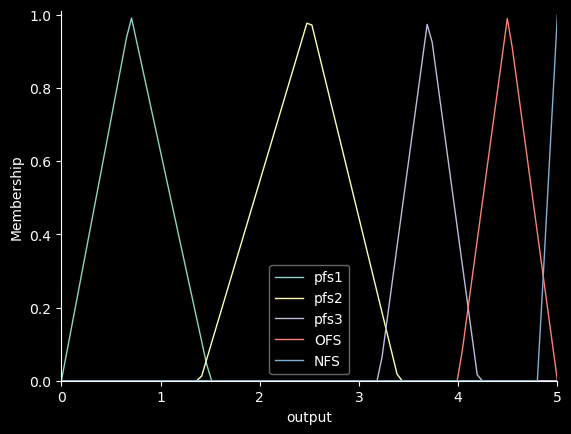

In [77]:
output.view()
plt.savefig("output.png")

In [78]:
output.terms

OrderedDict([('pfs1', output[pfs1]),
             ('pfs2', output[pfs2]),
             ('pfs3', output[pfs3]),
             ('OFS', output[OFS]),
             ('NFS', output[NFS])])

In [92]:
output_ctrl = ctrl.ControlSystem(rules)
output_simulation = ctrl.ControlSystemSimulation(output_ctrl)

df['predicted_output'] = df.apply(
    lambda row: backward_chaining_predict(row=row, rules=rules, output=output), 
    axis=1
    )

Inputs for record: {'week': 'week 1', 'BP_sitting': '150/90', 'BP_standing': '158/92', 'weight': 250, 'heart_rate': 78, 'swelling': 3, 'shortness_of_breath_with_exertion': 3, 'shortness_of_breath_at_rest': 0, 'chest_tightness': 1, 'sob_chest_tightness_lying_down': 2, 'sleep_apnea': 1, 'excessive_daytime_sleep': 1, 'fatigue': 1, 'sleeping_in_recliner': 3, 'dizziness': 0, 'cramps': 0, 'fall': 0, 'unsteadiness': 0, 'lightheadedness_standing': 0, 'itching': 1, 'vomiting': 0, 'nausea': 0, 'loss_of_appetite': 0, 'diarrhea': 2, 'medications_Amlodipine 5 mg': 'y', 'medications_dapagliflozin 10': 'n', 'medications_potassium_chloride_20_meq_day': 'n', 'medications_Lisinopril 20 mg': 'y', 'medications_lasix 40 mg': 'n', 'medications_hydrochlorothiazide 25': 'n', 'medications_Metoprolol 25 mg': 'n', 'medications_spironolactone 25 mg': 'n', 'eGFR': 21, 'output': 'pfs2', 'predicted_output': 'NFS'}
Raw fuzzy output: {'output': 4.932438001598822}
Defuzzified output: 4.932438001598822
Mapped fuzzy outp

In [215]:
df

,patient,age,gender,height,week,weight,heart_rate,swelling,shortness_of_breath_with_exertion,shortness_of_breath_at_rest,...,medications_BUN mg/dl,medications_Creatinine mg/dl,medications_Betahydroxybutyrate mmol/l (0.1-0.4),medications_venofer,medications_ferrous sulfate,output,BP_sitting_systolic,BP_sitting_diastolic,BP_standing_systolic,BP_standing_diastolic
0,Patient 1,72,0,164,week1,170,78,1,0,0,...,None,None,None,None,None,PFS1,140.0,68.0,148.0,74.0
1,Patient 1,72,0,164,week2,174,82,2,1,0,...,None,None,None,None,None,PFS2,152.0,78.0,160.0,82.0
2,Patient 1,72,0,164,week3,178,92,3,2,1,...,46,3,0.7,started,started,PFS4,174.0,84.0,182.0,86.0
3,Patient 1,72,0,164,week4,172,78,1,1,0,...,41,2.3,0.8,no,yes,PFS1,148.0,74.0,146.0,72.0
4,Patient 1,72,0,164,week5,168,72,0.5,0,0,...,38,2.4,0.7,no,yes,OFS,132.0,75.0,128.0,68.0
5,Patient 1,72,0,164,week6,162,88,0,0,0,...,52,2.6,3,None,yes,NFS,120.0,64.0,110.0,48.0
6,Patient 1,72,0,164,week7,158,94,0,1,0,...,64,3.5,3,None,None,NFS,110.0,68.0,94.0,60.0
7,Patient 2,68,1,172,week1,168,68,1,2,0,...,None,None,None,None,None,OFS,130.0,70.0,128.0,68.0
8,Patient 2,68,1,172,week 2,170,70,1,2,0,...,None,0,0,0,0,PFS1,140.0,78.0,150.0,78.0
9,Patient 2,68,1,172,week3,172,74,2,3,0,...,None,0,0,0,0,PFS2,148.0,78.0,152.0,78.0


In [94]:
mismatches = df[df['output'] != df['predicted_output']]
mismatches

,week,BP_sitting,BP_standing,weight,heart_rate,swelling,shortness_of_breath_with_exertion,shortness_of_breath_at_rest,chest_tightness,sob_chest_tightness_lying_down,...,medications_dapagliflozin 10,medications_potassium_chloride_20_meq_day,medications_Lisinopril 20 mg,medications_lasix 40 mg,medications_hydrochlorothiazide 25,medications_Metoprolol 25 mg,medications_spironolactone 25 mg,eGFR,output,predicted_output
0,week 1,150/90,158/92,250,78,3,3,0,1,2,...,n,n,y,n,n,n,n,21,pfs2,NFS
2,week 3,178/88,182/98,258,88,4,5,3,2,4,...,n,n,y,n,n,n,n,21,pfs3,pfs2
4,week 5,154/80,162/88,252,82,2,3,1,2,3,...,y,n,y,y,n,n,n,21,pfs1,pfs2
5,week 6,152/80,158/78,250,81,2,3,1,1,2,...,y,n,y,y,n,n,n,21,pfs1,pfs2
6,week 7,150/78,154/78,248,88,2,3,0,1,2,...,y,n,y,y,n,n,n,21,pfs1,pfs2
7,week 8,148/74,146/78,246,90,1,2,0,0,1,...,y,n,y,y,n,n,n,21,OFS,pfs2
8,week 9,136/82,138/72,244,89,1,1,0,0,0,...,y,n,y,y,n,n,n,21,OFS,NFS
10,week 11,114/70,110/70,240,104,0,0,0,0,0,...,y,n,y,y,n,n,n,21,NFS,OFS
11,week 12,102/70,92/60,238,106,0,0,0,0,0,...,y,n,y,y,n,n,n,21,NFS,OFS


In [149]:
df[['BP_sitting_systolic', 'BP_sitting_diastolic']] = df['BP_sitting'].str.split('/', expand=True).astype(float)
df[['BP_standing_systolic', 'BP_standing_diastolic']] = df['BP_standing'].str.split('/', expand=True).astype(float)

In [197]:
df

,patient,age,height,week,weight,heart_rate,swelling,shortness_of_breath_with_exertion,shortness_of_breath_at_rest,chest_tightness,...,medications_BUN mg/dl,medications_Creatinine mg/dl,medications_Betahydroxybutyrate mmol/l (0.1-0.4),medications_venofer,medications_ferrous sulfate,output,BP_sitting_systolic,BP_sitting_diastolic,BP_standing_systolic,BP_standing_diastolic
0,Patient 1,72,164,week1,170,78,1,0,0,0,...,None,None,None,None,None,PFS1,140.0,68.0,148.0,74.0
1,Patient 1,72,164,week2,174,82,2,1,0,0,...,None,None,None,None,None,PFS2,152.0,78.0,160.0,82.0
2,Patient 1,72,164,week3,178,92,3,2,1,1,...,46,3,0.7,started,started,PFS4,174.0,84.0,182.0,86.0
3,Patient 1,72,164,week4,172,78,1,1,0,0,...,41,2.3,0.8,no,yes,PFS1,148.0,74.0,146.0,72.0
4,Patient 1,72,164,week5,168,72,0.5,0,0,0,...,38,2.4,0.7,no,yes,OFS,132.0,75.0,128.0,68.0
5,Patient 1,72,164,week6,162,88,0,0,0,0,...,52,2.6,3,None,yes,NFS,120.0,64.0,110.0,48.0
6,Patient 1,72,164,week7,158,94,0,1,0,1,...,64,3.5,3,None,None,NFS,110.0,68.0,94.0,60.0
7,Patient 2,68,172,week1,168,68,1,2,0,0,...,None,None,None,None,None,OFS,130.0,70.0,128.0,68.0
8,Patient 2,68,172,week 2,170,70,1,2,0,0,...,None,0,0,0,0,PFS1,140.0,78.0,150.0,78.0
9,Patient 2,68,172,week3,172,74,2,3,0,0,...,None,0,0,0,0,PFS2,148.0,78.0,152.0,78.0


In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

X = df[[
    'age',
    'gender',
    'height',
    'BP_sitting_systolic', 
    'BP_sitting_diastolic',
    'BP_standing_systolic',
    'BP_standing_diastolic',
    'weight',
    'swelling', 
    'heart_rate', 
    'shortness_of_breath_with_exertion',
    'shortness_of_breath_at_rest',
    'chest_tightness',
    'sob_chest_tightness_lying_down',
    'sleep_apnea',
    'excessive_daytime_sleep',
    'fatigue',
    'sleeping_in_recliner',
    'dizziness',
    'cramps',
    'fall',
    'unsteadiness',
    'lightheadedness_standing',
    'itching',
    'vomiting',
    'nausea',
    'loss_of_appetite',
    'diarrhea'
    ]].fillna(0)

y = df['output']



In [219]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)


tree_rules = export_text(clf, feature_names=X.columns.to_list())
print(tree_rules)

|--- BP_standing_systolic <= 112.00
|   |--- weight <= 290.00
|   |   |--- class: NFS
|   |--- weight >  290.00
|   |   |--- BP_standing_systolic <= 103.00
|   |   |   |--- class: NFS2
|   |   |--- BP_standing_systolic >  103.00
|   |   |   |--- class: NFS1
|--- BP_standing_systolic >  112.00
|   |--- BP_standing_systolic <= 133.00
|   |   |--- class: OFS
|   |--- BP_standing_systolic >  133.00
|   |   |--- height <= 163.50
|   |   |   |--- class: pfs1
|   |   |--- height >  163.50
|   |   |   |--- class: PFS2



In [220]:
X.fillna(0)

,age,gender,height,BP_sitting_systolic,BP_sitting_diastolic,BP_standing_systolic,BP_standing_diastolic,weight,swelling,heart_rate,...,dizziness,cramps,fall,unsteadiness,lightheadedness_standing,itching,vomiting,nausea,loss_of_appetite,diarrhea
0,72,0,164,140.0,68.0,148.0,74.0,170,1,78,...,0,0,0,0,0,0,0,0,0,0
1,72,0,164,152.0,78.0,160.0,82.0,174,2,82,...,0,0,0,0,0,0,0,0,0,0
2,72,0,164,174.0,84.0,182.0,86.0,178,3,92,...,0,0,0,1,0,1,0,0,1,0
3,72,0,164,148.0,74.0,146.0,72.0,172,1,78,...,0,0,0,0,0,0,0,0,0,0
4,72,0,164,132.0,75.0,128.0,68.0,168,0.5,72,...,0,0.5,0,0,0,0,0,0,0,0
5,72,0,164,120.0,64.0,110.0,48.0,162,0,88,...,1,1,0,1,0,0,0,1,0.5,1
6,72,0,164,110.0,68.0,94.0,60.0,158,0,94,...,2,2,1,2,0,1,1,2,1,2
7,68,1,172,130.0,70.0,128.0,68.0,168,1,68,...,0,1,0,1,0,1,0,0,2,0
8,68,1,172,140.0,78.0,150.0,78.0,170,1,70,...,1,1,0,1,0,1,0,0,2,0
9,68,1,172,148.0,78.0,152.0,78.0,172,2,74,...,0,0,0,1,0,1,0,0,2,0


In [221]:
clf.predict(X)

array(['PFS2', 'PFS2', 'PFS2', 'PFS2', 'OFS', 'NFS', 'NFS', 'OFS', 'PFS2',
       'PFS2', 'PFS2', 'PFS2', 'NFS', 'NFS', 'OFS', 'PFS2', 'PFS2',
       'PFS2', 'PFS2', 'PFS2', 'pfs1', 'pfs1', 'pfs1', 'pfs1', 'pfs1',
       'pfs1', 'pfs1', 'pfs1', 'pfs1', 'OFS', 'NFS', 'NFS', 'OFS', 'OFS',
       'PFS2', 'PFS2', 'PFS2', 'PFS2', 'PFS2', 'PFS2', 'PFS2', 'OFS',
       'NFS1', 'NFS2'], dtype=object)

In [222]:
df['output']

0     PFS1
1     PFS2
2     PFS4
3     PFS1
4      OFS
5      NFS
6      NFS
7      OFS
8     PFS1
9     PFS2
10    PFS3
11    PFS3
12     NFS
13     NFS
14     OFS
15    PFS1
16    PFS2
17    PFS3
18    PFS3
19    PFS4
20    pfs2
21    pfs2
22    pfs3
23    pfs2
24    pfs1
25    pfs1
26    pfs1
27     OFS
28     OFS
29     OFS
30     NFS
31     NFS
32     OFS
33     OFS
34    pfs1
35    PFS2
36    PFS2
37    PFS3
38    PFS4
39    PFS2
40    PFS1
41     OFS
42    NFS1
43    NFS2
Name: output, dtype: object

In [98]:
df.columns

Index(['week', 'BP_sitting', 'BP_standing', 'weight', 'heart_rate', 'swelling',
       'shortness_of_breath_with_exertion', 'shortness_of_breath_at_rest',
       'chest_tightness', 'sob_chest_tightness_lying_down', 'sleep_apnea',
       'excessive_daytime_sleep', 'fatigue', 'sleeping_in_recliner',
       'dizziness', 'cramps', 'fall', 'unsteadiness',
       'lightheadedness_standing', 'itching', 'vomiting', 'nausea',
       'loss_of_appetite', 'diarrhea', 'medications_Amlodipine 5 mg',
       'medications_dapagliflozin 10',
       'medications_potassium_chloride_20_meq_day',
       'medications_Lisinopril 20 mg', 'medications_lasix 40 mg',
       'medications_hydrochlorothiazide 25', 'medications_Metoprolol 25 mg',
       'medications_spironolactone 25 mg', 'eGFR', 'output',
       'predicted_output', 'BP_sitting_systolic', 'BP_sitting_diastolic'],
      dtype='object')

In [247]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
import pandas as pd

feature_cols = [
    'age',
    'gender',
    'height',
    'BP_sitting_systolic', 
    'BP_sitting_diastolic',
    'BP_standing_systolic',
    'BP_standing_diastolic',
    'weight',
    'swelling', 
    'heart_rate', 
    'shortness_of_breath_with_exertion',
    'shortness_of_breath_at_rest',
    'chest_tightness',
    'sob_chest_tightness_lying_down',
    'sleep_apnea',
    'excessive_daytime_sleep',
    'fatigue',
    'sleeping_in_recliner',
    'dizziness',
    'cramps',
    'fall',
    'unsteadiness',
    'lightheadedness_standing',
    'itching',
    'vomiting',
    'nausea',
    'loss_of_appetite',
    'diarrhea'
    ]
X = df[feature_cols].fillna(0)
y = df['output']

y_encoded = y.str.lower().replace({'nfs1': 'nfs', 'nfs2': 'nfs'}).map({'pfs1': 0, 'pfs2': 1, 'pfs3': 2, 'pfs4': 3, 'ofs': 4, 'nfs': 5})

min_test_cases_per_class = 1
n_splits = y_encoded.nunique()
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

loo = LeaveOneOut()

for train_index, test_index in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded.iloc[train_index], y_encoded.iloc[test_index]

/home/kmallick/.conda/envs/cent7/2024.02-py311/kmallick/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(


In [248]:
y_train.value_counts()

output
0    8
1    7
4    7
5    7
2    5
3    3
Name: count, dtype: int64

In [271]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


tree_rules = export_text(clf, feature_names=X.columns.to_list())
print(tree_rules)

|--- BP_standing_systolic <= 112.00
|   |--- class: 5
|--- BP_standing_systolic >  112.00
|   |--- BP_sitting_systolic <= 137.00
|   |   |--- BP_standing_diastolic <= 82.00
|   |   |   |--- class: 4
|   |   |--- BP_standing_diastolic >  82.00
|   |   |   |--- class: 0
|   |--- BP_sitting_systolic >  137.00
|   |   |--- fatigue <= 2.50
|   |   |   |--- class: 0
|   |   |--- fatigue >  2.50
|   |   |   |--- class: 2



In [272]:
y_test == clf.predict(X_test)

13     True
22     True
23    False
24     True
27    False
35    False
41     True
Name: output, dtype: bool

In [273]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, clf.predict(X_test)))
print(precision_score(y_test, clf.predict(X_test), average='macro'))
print(recall_score(y_test, clf.predict(X_test), average='macro'))
print(f1_score(y_test, clf.predict(X_test), average='macro'))

0.5714285714285714
0.5666666666666667
0.7
0.5666666666666667


/home/kmallick/.conda/envs/cent7/2024.02-py311/kmallick/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
# from simpful import *

# # Create a fuzzy system
# FS = FuzzySystem()

# # Add input variables (features)
# FS.add_input_variable("BP_sitting_systolic", range(80, 200))
# FS.add_input_variable("swelling", range(0, 6))
# FS.add_input_variable("heart_rate", range(50, 150))
# FS.add_input_variable("shortness_of_breath_with_exertion", range(0, 5))

# # Add an output variable
# FS.add_output_variable("output", range(0, 5))

# # Define membership functions for inputs
# FS.set_variable("BP_sitting_systolic", [
#     ("low", Triangular_MF([80, 80, 120])),
#     ("normal", Triangular_MF([100, 130, 150])),
#     ("high", Triangular_MF([140, 200, 200]))
# ])

# FS.set_variable("swelling", [
#     ("none", Triangular_MF([0, 0, 1])),
#     ("mild", Triangular_MF([1, 2, 3])),
#     ("severe", Triangular_MF([3, 5, 5]))
# ])

# FS.set_variable("heart_rate", [
#     ("low", Triangular_MF([50, 50, 70])),
#     ("normal", Triangular_MF([60, 80, 100])),
#     ("high", Triangular_MF([90, 150, 150]))
# ])

# FS.set_variable("shortness_of_breath_with_exertion", [
#     ("none", Triangular_MF([0, 0, 1])),
#     ("mild", Triangular_MF([1, 2, 3])),
#     ("severe", Triangular_MF([3, 5, 5]))
# ])

# # Define membership functions for the output
# FS.set_variable("output", [
#     ("pfs1", Triangular_MF([0, 0, 1])),
#     ("pfs2", Triangular_MF([1, 2, 3])),
#     ("pfs3", Triangular_MF([2, 3, 4])),
#     ("OFS", Triangular_MF([3, 4, 5])),
#     ("NFS", Triangular_MF([4, 5, 5]))
# ])

# # Add initial rules
# FS.add_rules([
#     "IF (BP_sitting_systolic IS high) AND (swelling IS mild) THEN (output IS pfs1)",
#     "IF (BP_sitting_systolic IS high) AND (swelling IS severe) THEN (output IS pfs2)",
#     "IF (heart_rate IS high) AND (BP_sitting_systolic IS high) THEN (output IS pfs3)",
#     "IF (swelling IS none) AND (shortness_of_breath_with_exertion IS none) THEN (output IS NFS)",
#     "IF (swelling IS mild) AND (shortness_of_breath_with_exertion IS mild) THEN (output IS OFS)"
# ])
